In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [2]:
17

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [76]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from copy import deepcopy
import numpy as np

In [77]:
df = pd.read_csv('data/bank-additional-full.csv')

In [78]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [80]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [81]:
df_master=deepcopy(df)

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [82]:
df=df.iloc[:, [0,1,2,3,4,5,6,7,-1]]
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [83]:
df.head()

,age,job,marital,education,default,housing,loan,contact,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,0
1,57,services,married,high.school,unknown,no,no,telephone,0
2,37,services,married,high.school,no,yes,no,telephone,0
3,40,admin.,married,basic.6y,no,no,no,telephone,0
4,56,services,married,high.school,no,no,yes,telephone,0


In [84]:
for col in df.columns:
    print(col,df[col].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
y 2


In [85]:
num_cols=['age']
cat_cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

In [86]:
df = df.replace('unknown', np.nan)

In [87]:
df.isnull().sum()

age             0
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
contact         0
y               0
dtype: int64

In [88]:
# Label Encoding of Categorical Variables

from sklearn.preprocessing import LabelEncoder

original=deepcopy(df)
mask=df[cat_cols].isnull()

df[cat_cols]=df[cat_cols].astype(str).apply(LabelEncoder().fit_transform)
df[cat_cols]=df[cat_cols].where(~mask, original)

In [89]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,y
0,56,3,1,0,1,1,1,1,0
1,57,8,1,3,NaN,1,1,1,0
2,37,8,1,3,1,2,1,1,0
3,40,0,1,1,1,1,1,1,0
4,56,8,1,3,1,1,2,1,0
5,45,8,1,2,NaN,1,1,1,0
6,59,0,1,6,1,1,1,1,0
7,41,1,1,NaN,NaN,1,1,1,0
8,24,10,3,6,1,2,1,1,0
9,25,8,3,3,1,2,1,1,0


In [90]:
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
import numpy as np

In [91]:
check_imputer=deepcopy(df)

In [92]:
# Estimate the score on the entire dataset by filling missing values by mean and median

br_estimator = BayesianRidge() #base estimator
N_SPLITS = 6  #defining the cross-validation splitting strategy

score_simple_imputer = pd.DataFrame() #dataframe to store error of imputer

#computing MSE for mean and median
for strategy in ('mean', 'median'):
    X=check_imputer.iloc[:,:-1]
    y=check_imputer.iloc[:,-1]
    estimator = make_pipeline(SimpleImputer(missing_values=np.nan, strategy=strategy), br_estimator)
    score_simple_imputer[strategy] = cross_val_score(estimator, X, y, scoring='neg_mean_squared_error', cv=N_SPLITS)

In [93]:
score_simple_imputer

,mean,median
0,-0.030636,-0.030616
1,-0.045455,-0.045439
2,-0.071374,-0.071362
3,-0.069541,-0.069528
4,-0.110160,-0.110196
5,-0.304844,-0.304877


In [94]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [95]:
# Estimate the score on the entire dataset by filling missing values by 4 different iterative imputer

# Estimators for IterativeImputer
estimators = [BayesianRidge(),
              DecisionTreeRegressor(max_features='sqrt', random_state=0),
              ExtraTreesRegressor(n_estimators=10, random_state=0),
              KNeighborsRegressor(n_neighbors=15)]

score_iterative_imputer = pd.DataFrame()

In [96]:
for esti in estimators:
        print("Estimating",esti.__class__.__name__)
        imputer = IterativeImputer(esti)
        df_new=check_imputer.copy()
        
        for col in check_imputer.columns:
            df_new[col]=imputer.fit_transform(df_new[[col]])
        X=df_new.iloc[:,:-1]
        y=check_imputer.iloc[:,-1:]
        
        score_iterative_imputer[esti.__class__.__name__]=cross_val_score(esti,X,y,scoring='neg_mean_squared_error',cv=6)

Estimating BayesianRidge
Estimating DecisionTreeRegressor
Estimating ExtraTreesRegressor
Estimating KNeighborsRegressor


In [97]:
score_iterative_imputer

,BayesianRidge,DecisionTreeRegressor,ExtraTreesRegressor,KNeighborsRegressor
0,-0.030634,-0.063822,-0.055058,-0.035477
1,-0.045453,-0.077204,-0.070520,-0.048915
2,-0.071374,-0.127444,-0.112410,-0.074196
3,-0.069542,-0.121391,-0.107201,-0.068273
4,-0.110162,-0.156956,-0.144942,-0.113076
5,-0.304841,-0.338408,-0.310649,-0.291827


In [98]:
import matplotlib.pyplot as plt

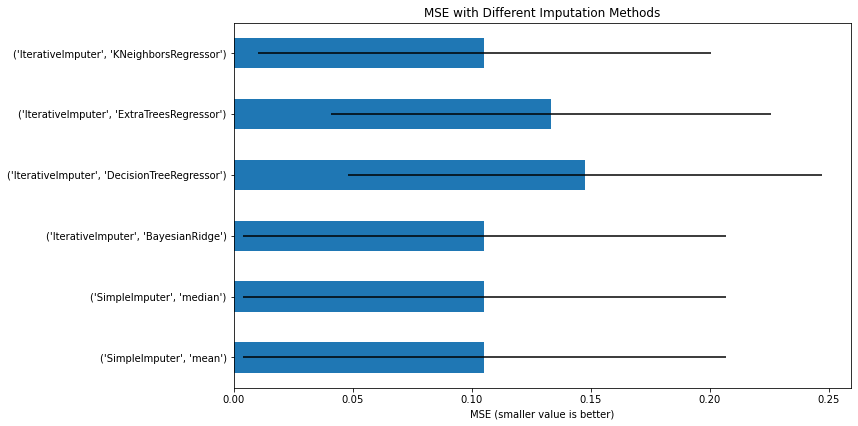

In [99]:
#ploting the graphs of scores each method
scores = pd.concat(
    [score_simple_imputer, score_iterative_imputer],
    keys=['SimpleImputer', 'IterativeImputer'], axis=1
)
fig, ax = plt.subplots(figsize=(12, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('MSE with Different Imputation Methods')
ax.set_xlabel('MSE (smaller value is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels(means.index.tolist())
plt.tight_layout(pad=1)
plt.savefig('different-imputations-method',dpi=None)
plt.show()

In [100]:
scores

SimpleImputer           IterativeImputer                        \
           mean    median    BayesianRidge DecisionTreeRegressor   
0     -0.030636 -0.030616        -0.030634             -0.063822   
1     -0.045455 -0.045439        -0.045453             -0.077204   
2     -0.071374 -0.071362        -0.071374             -0.127444   
3     -0.069541 -0.069528        -0.069542             -0.121391   
4     -0.110160 -0.110196        -0.110162             -0.156956   
5     -0.304844 -0.304877        -0.304841             -0.338408   

                                           
  ExtraTreesRegressor KNeighborsRegressor  
0           -0.055058           -0.035477  
1           -0.070520           -0.048915  
2           -0.112410           -0.074196  
3           -0.107201           -0.068273  
4           -0.144942           -0.113076  
5           -0.310649           -0.291827

In [101]:
scores.describe()

SimpleImputer           IterativeImputer                        \
               mean    median    BayesianRidge DecisionTreeRegressor   
count      6.000000  6.000000         6.000000              6.000000   
mean      -0.105335 -0.105336        -0.105334             -0.147538   
std        0.101417  0.101437         0.101416              0.099562   
min       -0.304844 -0.304877        -0.304841             -0.338408   
25%       -0.100464 -0.100487        -0.100465             -0.149578   
50%       -0.070457 -0.070445        -0.070458             -0.124418   
75%       -0.051476 -0.051461        -0.051475             -0.088251   
max       -0.030636 -0.030616        -0.030634             -0.063822   

                                               
      ExtraTreesRegressor KNeighborsRegressor  
count            6.000000            6.000000  
mean            -0.133463           -0.105294  
std              0.092487            0.095127  
min             -0.310649           -0.291827  
25%             -0.136809           -0.103356  
50%             -0.109805           -0.071234  
75%             -0.079690           -0.053754  
max             -0.055058           -0.035477

In [102]:
# We proceed with K-Nearest Neighbours Imputation

In [104]:
# ckpt=deepcopy(df)

In [105]:
for col in cat_cols:
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    df[col]=imputer.fit_transform(df[[col]])

In [106]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
y            0
dtype: int64

In [108]:
for col in df.columns:
    print(col, df[col].unique())

age [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job [ 3.  8.  0.  1. 10.  6.  4. 11.  7.  2.  9.]
marital [1. 3. 0.]
education [0. 3. 1. 2. 6. 7. 4.]
default [1. 2.]
housing [1. 2.]
loan [1. 2.]
contact [1. 0.]
y [0 1]


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [109]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:,:-1], df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [111]:
X.head(), y.head()

(   age  job  marital  education  default  housing  loan  contact
 0   56  3.0      1.0        0.0      1.0      1.0   1.0      1.0
 1   57  8.0      1.0        3.0      1.0      1.0   1.0      1.0
 2   37  8.0      1.0        3.0      1.0      2.0   1.0      1.0
 3   40  0.0      1.0        1.0      1.0      1.0   1.0      1.0
 4   56  8.0      1.0        3.0      1.0      1.0   2.0      1.0,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: y, dtype: int64)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [117]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train a majority class classifier (baseline)
model = DummyClassifier(strategy="most_frequent")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")


Accuracy: 0.88759
Precision: 0.00000
Recall: 0.00000
F1 Score: 0.00000


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [118]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train a simple logistic regression model (baseline)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.89
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


### Problem 9: Score the Model

What is the accuracy of your model?

In [119]:
0.89

0.89

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [121]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import time

# Create a list of models with their names
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("K-Nearest Neighbors (KNN)", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
#     ("SVM", SVC())
]

# Initialize a list to store the results
results = []

# Iterate through the models
for model_name, model in models:
    start_time = time.time()  # Start timing the model fitting
    model.fit(X_train, y_train)  # Fit the model
    end_time = time.time()  # End timing
    train_time = end_time - start_time  # Calculate training time
    train_accuracy = accuracy_score(y_train, model.predict(X_train))  # Training accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test))  # Testing accuracy
    results.append([model_name, train_time, train_accuracy, test_accuracy])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
print(results_df)

                       Model  Train Time  Train Accuracy  Test Accuracy
0        Logistic Regression    0.316760        0.887239       0.887594
1  K-Nearest Neighbors (KNN)    0.126511        0.892130       0.879663
2              Decision Tree    0.096594        0.916444       0.863640


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [122]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,y
0,56,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0
1,57,8.0,1.0,3.0,1.0,1.0,1.0,1.0,0
2,37,8.0,1.0,3.0,1.0,2.0,1.0,1.0,0
3,40,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,56,8.0,1.0,3.0,1.0,1.0,2.0,1.0,0
5,45,8.0,1.0,2.0,1.0,1.0,1.0,1.0,0
6,59,0.0,1.0,6.0,1.0,1.0,1.0,1.0,0
7,41,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0
8,24,10.0,3.0,6.0,1.0,2.0,1.0,1.0,0
9,25,8.0,3.0,3.0,1.0,2.0,1.0,1.0,0


In [123]:
for col in df.columns:
    print(col, df[col].unique())

age [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job [ 3.  8.  0.  1. 10.  6.  4. 11.  7.  2.  9.]
marital [1. 3. 0.]
education [0. 3. 1. 2. 6. 7. 4.]
default [1. 2.]
housing [1. 2.]
loan [1. 2.]
contact [1. 0.]
y [0 1]


In [124]:
for col in ['default', 'housing','loan']:
    df[col]=df[col].replace({1:0, 2:1})

In [125]:
for col in df.columns:
    print(col, df[col].unique())

age [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job [ 3.  8.  0.  1. 10.  6.  4. 11.  7.  2.  9.]
marital [1. 3. 0.]
education [0. 3. 1. 2. 6. 7. 4.]
default [0. 1.]
housing [0. 1.]
loan [0. 1.]
contact [1. 0.]
y [0 1]


In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['age'] = scaler.fit_transform(df[['age']])
df.head()

,age,job,marital,education,default,housing,loan,contact,y
0,0.481481,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,0.493827,8.0,1.0,3.0,0.0,0.0,0.0,1.0,0
2,0.246914,8.0,1.0,3.0,0.0,1.0,0.0,1.0,0
3,0.283951,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
4,0.481481,8.0,1.0,3.0,0.0,0.0,1.0,1.0,0


In [127]:
df_encoded = pd.get_dummies(df, columns=['job', 'education', 'marital'])
df_encoded.head()

,age,default,housing,loan,contact,y,job_0.0,job_1.0,job_2.0,job_3.0,...,education_0.0,education_1.0,education_2.0,education_3.0,education_4.0,education_6.0,education_7.0,marital_0.0,marital_1.0,marital_3.0
0,0.481481,0.0,0.0,0.0,1.0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0.493827,0.0,0.0,0.0,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.246914,0.0,1.0,0.0,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.283951,0.0,0.0,0.0,1.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0.481481,0.0,0.0,1.0,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [141]:
from sklearn.model_selection import train_test_split
X, y = df_encoded, df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
X_train.shape, X_test.shape

((28831, 27), (12357, 27))

In [143]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import time

# Create a list of models with their names
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("K-Nearest Neighbors (KNN)", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
#     ("SVM", SVC())
]

# Initialize a list to store the results
results = []

# Iterate through the models
for model_name, model in models:
    start_time = time.time()  # Start timing the model fitting
    model.fit(X_train, y_train)  # Fit the model
    end_time = time.time()  # End timing
    train_time = end_time - start_time  # Calculate training time
    y_pred = model.predict(X_test)  # Make predictions

    accuracy = accuracy_score(y_test, y_pred)  # Testing accuracy
    precision = precision_score(y_test, y_pred)  # Precision
    recall = recall_score(y_test, y_pred)  # Recall

    results.append([model_name, train_time, accuracy, precision, recall])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Accuracy', 'Precision', 'Recall'])
print(results_df)


                       Model  Train Time  Accuracy  Precision    Recall
0        Logistic Regression    0.140750  1.000000        1.0  1.000000
1  K-Nearest Neighbors (KNN)    0.008242  0.984624        1.0  0.863211
2              Decision Tree    0.022089  1.000000        1.0  1.000000


##### Questions